# Regularization of linear regression. Practical work

## Purpose

Learn to build a linear regression model with regularization

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.


## Dataset

	•	LotArea — lot size in square feet.
	•	LotArea_M — lot size in square meters.
	•	Street — type of access to the road.
	•	BldgType — type of dwelling.
	•	OverallQual — overall quality of material and finish.
	•	OverallCond — overall condition rating.
	•	YearBuilt — original construction date.
	•	YearRemodAdd — remodeling date.
	•	RoofStyle — roof type.
	•	ExterQual — quality of exterior material.
	•	ExterCond — current condition of exterior material.
	•	Foundation — type of foundation.
	•	TotalBsmtSF — total basement area in square feet.
	•	TotalBsmtSF_M — total basement area in square meters.
	•	Heating — type of heating.
	•	HeatingQC — quality and condition of heating.
	•	CentralAir — air conditioning.
	•	GrLivArea — living area in square feet.
	•	GrLivArea_M — living area in square meters.
	•	Bath — number of bathrooms.
	•	KitchenQual — kitchen quality.
	•	GarageArea — garage area in square feet.
	•	GarageArea_M — garage area in square meters.
	•	DateSold — month and year of sale.
	•	SaleCondition — sale conditions.
	•	SalePrice — sale price in dollars.This is the target variable that needs to be predicted.

Build a linear regression model on this data. Check the quality of the model on training and test samples using MAE, MSE, $R^2$.

## Import the necessary libraries

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

## Data Collection

Read the data and look at a few lines.

In [11]:
df = pd.read_csv('data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Data Preparation

1. Descriptive statistics for numerical traits.

In [15]:
df.describe()

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

2. Build a correlation matrix of numerical features and remove linearly dependent features

In [63]:
df.corr(numeric_only=True)

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,HouseAge,TotalArea,LivAreaLotAreaRatio
LotArea,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.263116,0.096360,0.180403,0.263843,-0.014832,0.303545,-0.343797
OverallQual,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.593007,0.554555,0.562022,0.790982,-0.572629,0.695875,0.142641
OverallCond,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.079686,-0.172989,-0.151521,-0.077856,0.377325,-0.155628,-0.061475
YearBuilt,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.199010,0.478016,0.478954,0.522897,-0.999036,0.394681,0.117388
YearRemodAdd,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.287389,0.420235,0.371600,0.507101,-0.590360,0.373263,0.130936
TotalBsmtSF,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,0.454868,0.193469,0.486665,0.613581,-0.391498,0.814750,-0.107448
GrLivArea,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,1.000000,0.699614,0.468997,0.708624,-0.200302,0.860112,0.144633
Bath,0.096360,0.554555,-0.172989,0.478016,0.420235,0.193469,0.699614,1.000000,0.384582,0.568267,-0.478153,0.557285,0.264249
GarageArea,0.180403,0.562022,-0.151521,0.478954,0.371600,0.486665,0.468997,0.384582,1.000000,0.623431,-0.479408,0.702170,-0.062205
SalePrice,0.263843,0.790982,-0.077856,0.522897,0.507101,0.613581,0.708624,0.568267,0.623431,1.000000,-0.523350,0.807518,-0.002416


In [18]:
df = df.drop(columns=['LotArea_M','TotalBsmtSF_M','GrLivArea_M','GarageArea_M'])

3. Individual graphs of the relationship between the objective function and an individual variable

The graphs will be constructed based on the correlation table. Clearly, the highest correlation values, approaching 1, indicate more dependent features. The following important characteristics can be highlighted: overall quality of materials and finishes, total basement area, total living area, and garage area. These features will have the greatest weights when training the model.

Text(0, 0.5, 'Price')

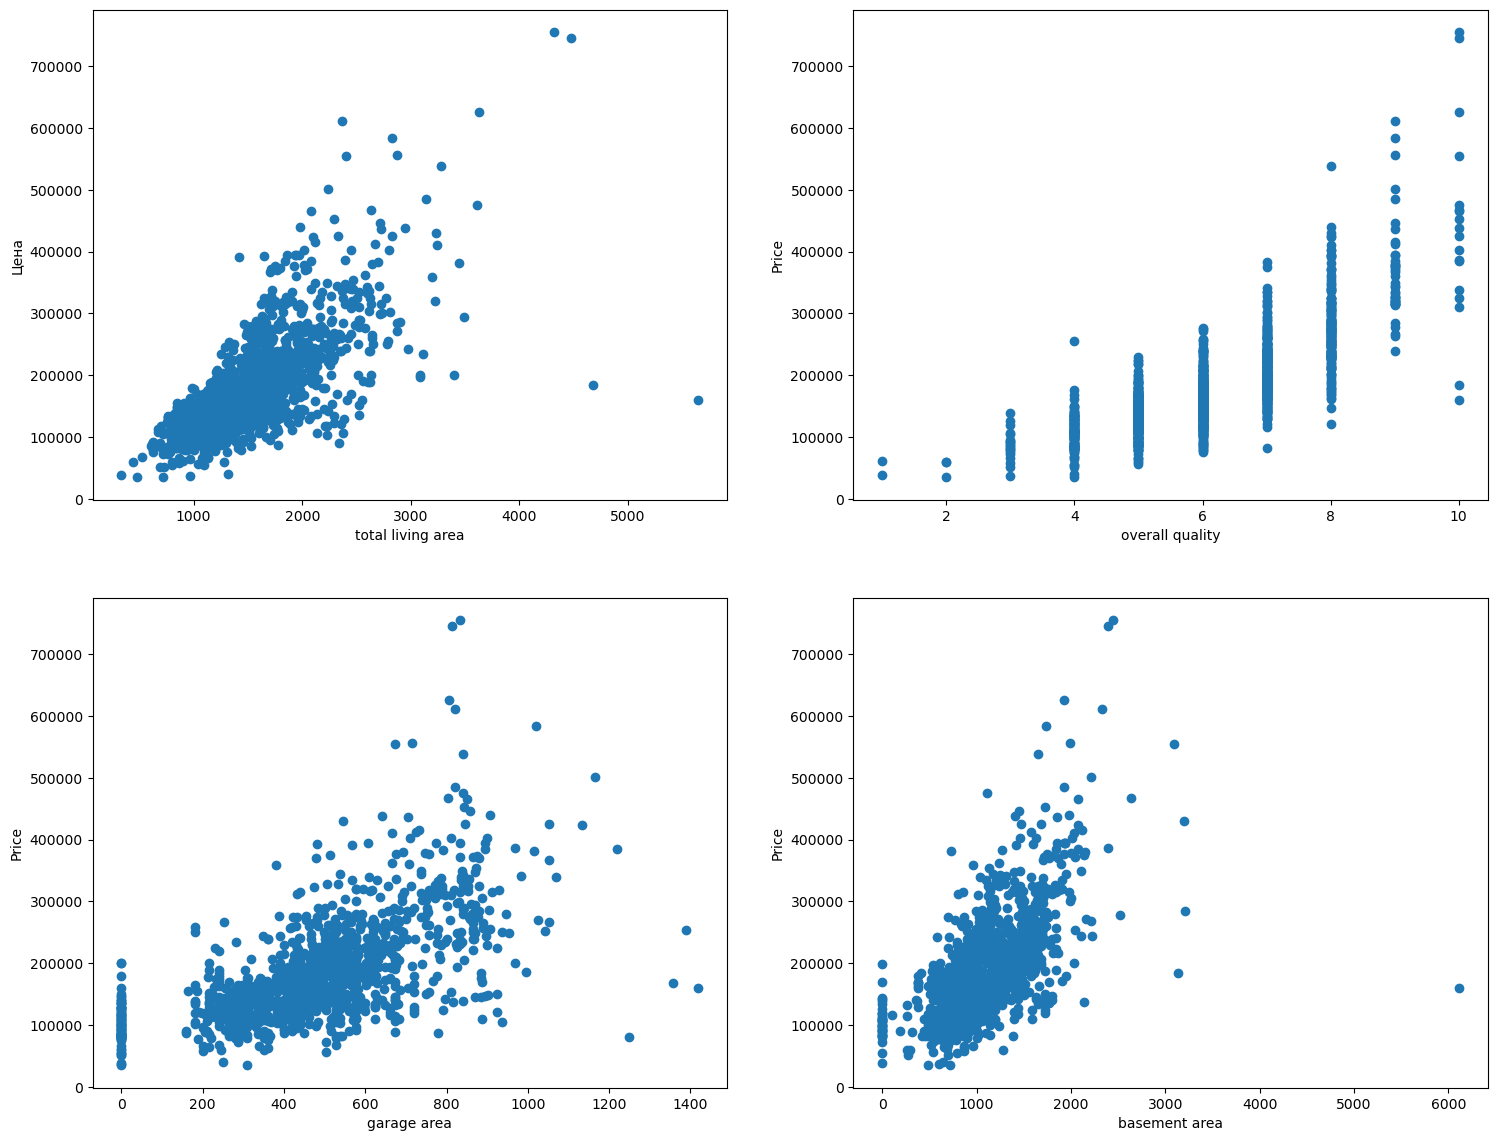

In [24]:
fig , axs = plt.subplots(2,2, figsize = (18,14))
axs[0, 0].scatter(df['GrLivArea'], df['SalePrice'], linewidths=1)
axs[0, 0].set_xlabel('total living area')
axs[0, 0].set_ylabel('Цена')

axs[0, 1].scatter(df['OverallQual'], df['SalePrice'], linewidths=1)
axs[0, 1].set_xlabel('overall quality')
axs[0, 1].set_ylabel('Price')

axs[1, 0].scatter(df['GarageArea'], df['SalePrice'], linewidths=1)
axs[1, 0].set_xlabel('garage area')
axs[1, 0].set_ylabel('Price')

axs[1, 1].scatter(df['TotalBsmtSF'], df['SalePrice'], linewidths=1)
axs[1, 1].set_xlabel('basement area')
axs[1, 1].set_ylabel('Price')

4. Preliminary conclusions.

Strong factors influencing the price will be living space and overall quality. Moderating factors would be: year built, number of bathrooms, and date of renovation.

5. New features (based on existing ones)

New features:

    •LivAreaLotAreaRatio — the ratio of living area to total area. This variable will indicate what portion of the total area is residential.
    
	•TotalArea — the total area of the premises, including the basement, garage, and living space.
 
	•HouseAge — the age of the house. Generally, newer houses tend to have a higher value.

In [34]:
df.DateSold = pd.to_datetime(df.DateSold , format='%m/%Y')
df['HouseAge'] = df.DateSold.dt.year - df.YearBuilt

In [36]:
df = df.drop(columns=['DateSold'])

In [38]:
df['TotalArea'] = df.TotalBsmtSF + df.GrLivArea + df.GarageArea
df['LivAreaLotAreaRatio '] = df.GrLivArea/df.LotArea

In [40]:
df.head()

,LotArea,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,CentralAir,GrLivArea,Bath,KitchenQual,GarageArea,SaleCondition,SalePrice,HouseAge,TotalArea,LivAreaLotAreaRatio
0,8450,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,Y,1710,3,Gd,548,Normal,208500,5,3114,0.202367
1,9600,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,Y,1262,2,TA,460,Normal,181500,31,2984,0.131458
2,11250,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,Y,1786,3,Gd,608,Normal,223500,7,3314,0.158756
3,9550,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,Y,1717,1,Gd,642,Abnorml,140000,91,3115,0.179791
4,14260,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,Y,2198,3,Gd,836,Normal,250000,8,4179,0.154137


6. Encode categorical features.

In [49]:
df_encode = pd.get_dummies(df,columns=['Street','BldgType','RoofStyle',
                                       'ExterQual','ExterCond','Foundation',
                                      'Heating','HeatingQC','CentralAir',
                                       'KitchenQual','SaleCondition'])

7. Prepare numerical features in the training and test samples for transfer to the model: bring them to a single scale.

In [51]:
d = preprocessing.normalize(df_encode, axis = 0)
df_encode_norm = pd.DataFrame(d, columns=df_encode.columns)

In [53]:
df_encode_norm

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,Bath,GarageArea,SalePrice,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.015255,0.029293,0.023017,0.026589,0.026409,0.019570,0.027902,0.03732,0.027632,0.027617,...,0.0,0.0,0.04131,0.000000,0.000000,0.0,0.0,0.0,0.028892,0.0
1,0.017331,0.025108,0.036827,0.026231,0.026053,0.028851,0.020592,0.02488,0.023195,0.024041,...,0.0,0.0,0.00000,0.036886,0.000000,0.0,0.0,0.0,0.028892,0.0
2,0.020310,0.029293,0.023017,0.026563,0.026396,0.021033,0.029142,0.03732,0.030657,0.029604,...,0.0,0.0,0.04131,0.000000,0.000000,0.0,0.0,0.0,0.028892,0.0
3,0.017241,0.029293,0.023017,0.025421,0.025974,0.017283,0.028016,0.01244,0.032372,0.018544,...,0.0,0.0,0.04131,0.000000,0.099504,0.0,0.0,0.0,0.000000,0.0
4,0.025743,0.033477,0.023017,0.026550,0.026369,0.026177,0.035865,0.03732,0.042154,0.033114,...,0.0,0.0,0.04131,0.000000,0.000000,0.0,0.0,0.0,0.028892,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.014292,0.025108,0.023017,0.026536,0.026369,0.021787,0.026874,0.03732,0.023195,0.023180,...,0.0,0.0,0.00000,0.036886,0.000000,0.0,0.0,0.0,0.028892,0.0
1456,0.023785,0.025108,0.027620,0.026257,0.026211,0.035253,0.033825,0.02488,0.025212,0.027816,...,0.0,0.0,0.00000,0.036886,0.000000,0.0,0.0,0.0,0.028892,0.0
1457,0.016323,0.029293,0.041430,0.025766,0.026448,0.026337,0.038182,0.02488,0.012707,0.035300,...,0.0,0.0,0.04131,0.000000,0.000000,0.0,0.0,0.0,0.028892,0.0
1458,0.017542,0.020923,0.027620,0.025886,0.026317,0.024645,0.017590,0.01244,0.012102,0.018825,...,0.0,0.0,0.04131,0.000000,0.000000,0.0,0.0,0.0,0.028892,0.0


8. Divide the data into training and test sets.

In [116]:
x = df_encode_norm.drop(columns=['SalePrice'])
y = df_encode.SalePrice

train_x, test_x, train_y, test_y = train_test_split(x,y,test_size= 0.3, random_state= 42)

## Model Training and Evaluation

1. Train a linear regression model without regularization. Look at the weights of the resulting model. Make predictions from the training and test sets.

In [118]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [124]:
print(f'Train: {model.score(train_x,train_y)} \n'
      f'Test: {model.score(test_x,test_y)}')

Train: 0.7907560503155643 
Test: 0.8307788271859038


In [126]:
print(model.coef_ , model.intercept_)

[ 2.77420881e+05  3.63133605e+06  9.04645796e+05  2.01747217e+07
  5.61411688e+06  3.70187613e+15  5.18667563e+15  1.60104978e+05
  1.67840706e+15 -1.03034393e+05 -1.03264390e+16 -3.11626166e+05
  7.09602253e+17  1.10464203e+19 -4.98835899e+19 -7.95167520e+18
 -1.02986300e+19 -9.36509124e+18 -1.52486084e+19  1.56157912e+18
  1.46296905e+19  1.43644387e+18  7.32445531e+18  1.14588580e+18
  6.12501723e+17 -1.67651847e+18 -8.69902721e+17 -5.13590028e+18
 -6.99794896e+18 -1.16119691e+18 -3.54751517e+18 -8.10068367e+18
 -6.70417351e+17 -2.40043117e+19  7.84987044e+18  1.63580183e+19
  1.65248757e+19  3.18267052e+18  1.59133526e+18  1.12524395e+18
  4.44879585e+17  1.68115045e+19  1.88746423e+18  1.17704074e+18
  6.29154742e+17  8.89759170e+17  1.57133122e+18  4.04070063e+17
  8.96122036e+17  5.77242948e+16  1.19420950e+18 -4.48590053e+18
 -1.70041201e+19  1.20718873e+18  7.53889122e+17  2.92229450e+18
  3.27279530e+18 -7.64816462e+17 -1.52204165e+17 -2.63625346e+17
 -3.40338859e+17 -2.63405

2. Observe how the model with L1-regularization (Lasso) behaves. Find the best regularization parameter. Make predictions based on training and test samples, measure quality using MAE, MSE, $R^2$. 

In [128]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(train_x,train_y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.425e+11, tolerance: 6.151e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [138]:
#MSE
pred_train = lasso_model.predict(train_x)
pred_test = lasso_model.predict(test_x)
print(f'Train: {mean_squared_error(pred_train, train_y)} \n'
      f'Test: {mean_squared_error(pred_test,test_y)}')

Train: 1200488668.5709205 
Test: 1110773223.3197901


In [136]:
#MAE
pred_train = lasso_model.predict(train_x)
pred_test = lasso_model.predict(test_x)
print(f'Train: {mean_absolute_error(pred_train, train_y)} \n'
      f'Test: {mean_absolute_error(pred_test,test_y)}')

Train: 19809.680674561572 
Test: 21162.529169975103


In [140]:
#R^2
print(f'Train: {lasso_model.score(train_x,train_y)} \n'
      f'Test: {lasso_model.score(test_x,test_y)}')

Train: 0.8005360778524049 
Test: 0.840819962962167


In [142]:
lasso_model.coef_

array([ 2.78278949e+05,  3.60907947e+06,  9.93575089e+05,  3.71010888e+06,
        3.74072992e+06,  1.03521379e+06,  3.56628910e+06,  1.93969711e+05,
        9.50177252e+05, -5.15785476e+05, -1.62998787e+06, -3.10118131e+05,
        5.94747769e+03, -0.00000000e+00,  3.55864903e+05, -2.00114276e+04,
       -7.96739137e+04, -1.66272249e+04,  3.04083977e+04,  2.06625635e+04,
       -2.00175625e+05, -9.84660171e+02,  1.63459244e+04,  3.59072692e+03,
        1.20299780e+04,  1.90617392e+05,  3.37954254e+04,  1.64329476e+05,
       -1.81714853e+04, -1.70822777e+04,  7.82210305e+03, -2.58628760e+04,
        1.01761741e+04,  0.00000000e+00, -5.97932390e+04, -8.22725837e+03,
        4.38892069e+04, -2.40758142e+04, -1.50964770e+04, -4.17668037e+04,
        8.62356114e+03, -0.00000000e+00,  1.76899879e+04,  5.40228900e+02,
       -4.73664186e+04,  5.35920714e+04,  7.29968326e+04,  2.92097494e+04,
       -4.20338685e+04, -8.64607373e+03, -0.00000000e+00, -4.63483244e+04,
        0.00000000e+00,  

You can see that some weights became equal to 0 => they did not greatly influence the predictive model, and L1-regularization eliminated unnecessary features

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [209]:
ridge_model = Ridge(alpha=0.0006)
ridge_model.fit(train_x,train_y)

Ridge(alpha=0.0006)

In [219]:
#MSE
pred_train = ridge_model.predict(train_x)
pred_test = ridge_model.predict(test_x)
print(f'Train: {mean_squared_error(pred_train, train_y)} \n'
      f'Test: {mean_squared_error(pred_test,test_y)}')

Train: 1201353434.4968362 
Test: 1111859288.1251209


In [221]:
#MAE
pred_train = ridge_model.predict(train_x)
pred_test = ridge_model.predict(test_x)
print(f'Train: {mean_absolute_error(pred_train, train_y)} \n'
      f'Test: {mean_absolute_error(pred_test,test_y)}')

Train: 19740.228159308666 
Test: 21123.955157228997


In [223]:
print(f'Train: {ridge_model.score(train_x,train_y)} \n'
      f'Test: {ridge_model.score(test_x,test_y)}') 

Train: 0.8003923950273698 
Test: 0.8406643237801013


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [225]:
ridge_model.coef_

array([ 2.81014120e+05,  3.42090196e+06,  1.02551160e+06,  2.70658154e+04,
        1.94566735e+05,  5.85938166e+04,  2.12640015e+06,  2.39722965e+05,
        5.03150762e+05, -6.21565619e+05,  1.17081471e+06, -2.96998174e+05,
        5.72305129e+03, -3.67638563e+02,  7.11229554e+04, -6.50109465e+04,
       -1.40380354e+05, -7.34855690e+04, -5.88249107e+04,  3.65980651e+04,
       -5.40756096e+04,  1.38978436e+04,  9.33166788e+04,  1.72782309e+04,
        1.74733606e+04,  1.72684715e+05,  2.00507315e+04,  1.02549309e+05,
       -1.19125523e+05, -1.47917656e+04,  8.53026413e+03, -2.21654566e+04,
        9.90815058e+03,  6.65828993e+03, -5.61115409e+04, -1.41447586e+04,
        4.98962046e+04, -2.71444811e+04, -1.38180068e+04, -3.93683614e+04,
        6.75690271e+03, -3.17172167e+03,  1.74513005e+04, -1.07360128e+03,
       -4.45670602e+04,  5.24635776e+04,  4.81391831e+04,  2.03161120e+04,
       -5.99116523e+04, -1.03299626e+04, -2.47588822e+04, -4.61648985e+04,
        1.21788803e+04,  

## Notes

1. In the last trained model, select the three features with the largest positive coefficients. 

In [227]:
coef_ridge = ridge_model.coef_
coef_df_ridge = pd.DataFrame({
    'Feature': x.columns,
    'Coef': coef_ridge
})
coef_df_ridge.sort_values(by=['Coef'], ascending=False)[:3]

,Feature,Coef
1,OverallQual,3.420902e+06
6,GrLivArea,2.126400e+06
10,TotalArea,1.170815e+06


The higher these values, the higher the transaction amount, since at the beginning graphs were built, based on which a positive correlation was observed between the found signs and the sale amount.

In [41]:
coef_df_ridge.sort_values(by=['Coef'])[:3]

,Feature,Coef
9,HouseAge,-617017.951901
11,LivAreaLotAreaRatio,-288306.517221
56,KitchenQual_TA,-164066.736067


2. In the Lasso model, select three features with zero coefficients

In [45]:
coef_lasso = lasso_model.coef_
coef_df_lasso = pd.DataFrame({
    'Feature': x.columns,
    'Coef': coef_lasso
})
coef_df_lasso.sort_values(by=['Coef'], ascending=False)
zero_coef_df_lasso = coef_df_lasso[coef_df_lasso['Coef'] == 0]
zero_coef_df_lasso

,Feature,Coef
13,Street_Pave,-0.0
33,ExterCond_TA,0.0
41,Heating_GasA,-0.0
50,HeatingQC_TA,-0.0
52,CentralAir_Y,0.0


In this model, these signs turned out to be insignificant, therefore the Lasso model excluded them

## Conclusion 
Using regularization, I learned how to train linear regression models with regularization, select the regularization coefficient alpha, and select features using L1-regularization.